In [2]:
import iapws
from iapws import IAPWS97 as gas

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

# Практика №4

## Задача 3.1

Определить коэффициент потерь и затраты энергии на трение диска для одновенечной турбинной ступени со следующими исходными данными: $H_0$ = 81 кДж/кг, $u/cф$ = 0,42 $F_1$ = 0,025 $м^2$, $d_{кор}$ = 1,09 м, $2s/d_{кор}$ = 0,2. p = 5 MPa, t = 489 C

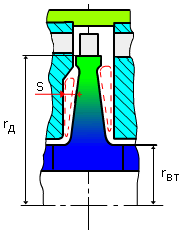

Потери от трения диска тем больше, чем меньше выходная площадь сопловой решетки $F_1$ (в первых ступенях турбин), а также при высоких параметрах пара, когда объемный пропуск $G_{v1}$ мал.

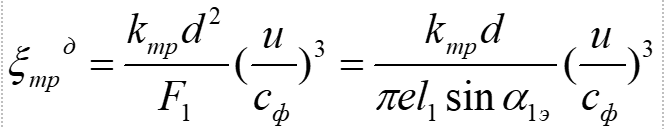

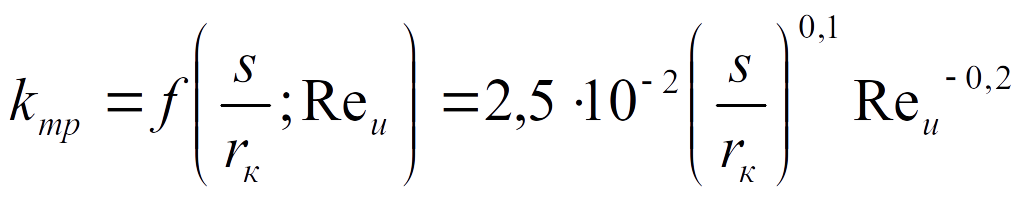 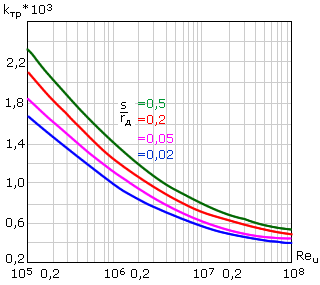

Обычно диапазон значений коэффициента трения равен kтр=(0,45…0,8) * 10-3.

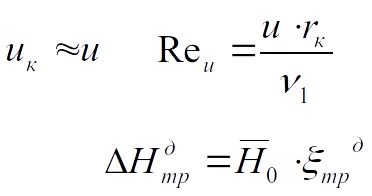

In [30]:
p = 5 * MPa
t = to_kelvin(489)

H_0 = 81 * 1000

u_div_dummy_speed = 0.42

F1 = 0.025
d_r = 1.09
s_div_r = 0.2 

In [7]:
dummy_speed = (2 * H_0) ** 0.5
u = u_div_dummy_speed * dummy_speed
u

169.0467390989841

In [32]:
point = gas(P=p * unit, T=t)
kinematic_viscosity = point.nu
kinematic_viscosity

1.904538398624566e-06

In [33]:
Re_number = u * d_r * 0.5 / kinematic_viscosity
Re_number

48374174.48526206

In [36]:
def get_k_frictions(s_div_r, re):
    return 2.5 * 10 ** (-2) * s_div_r ** 0.1 * re **(-0.2)

k_frictions = get_k_frictions(s_div_r, Re_number)
k_frictions

0.0006181876077216381

In [37]:
def get_friction_loss_pu(k, d, u_div_dummy_speed, F):
    return k * d ** 2 * u_div_dummy_speed ** 3 / F 

In [39]:
friction_loss_pu = get_friction_loss_pu(k_frictions, d_r, u_div_dummy_speed, F1)
friction_loss_pu

0.002176612672145375

In [41]:
friction_loss = friction_loss_pu * H_0
friction_loss

176.30562644377537

In [42]:
print("Ответ на задачу 3.1: ", round(friction_loss / 1000, 3), "kJ / kg")

Ответ на задачу 3.1:  0.176 kJ / kg


## Задача 3.2

Для одновенечной ступени со степенью парциальности e = 0,8 оценить  потери от парциальности. Sin(α1э) = 0,225; u/cф = 0,42; i = 4; B2 = 0,035 м; l2 = 35 мм; ηол = 0,82; H0 = 81 кДж/кг

Степенью парциальности называют отношение длины окружности, занятой каналами сопловой решетки, через которые осуществляется доступ пара к рабочей решетке, к общей длине окружности, определяемой по среднему диаметру dср $$e=\frac{z_1\cdot t_1}{\pi \cdot d_{ср}}$$.

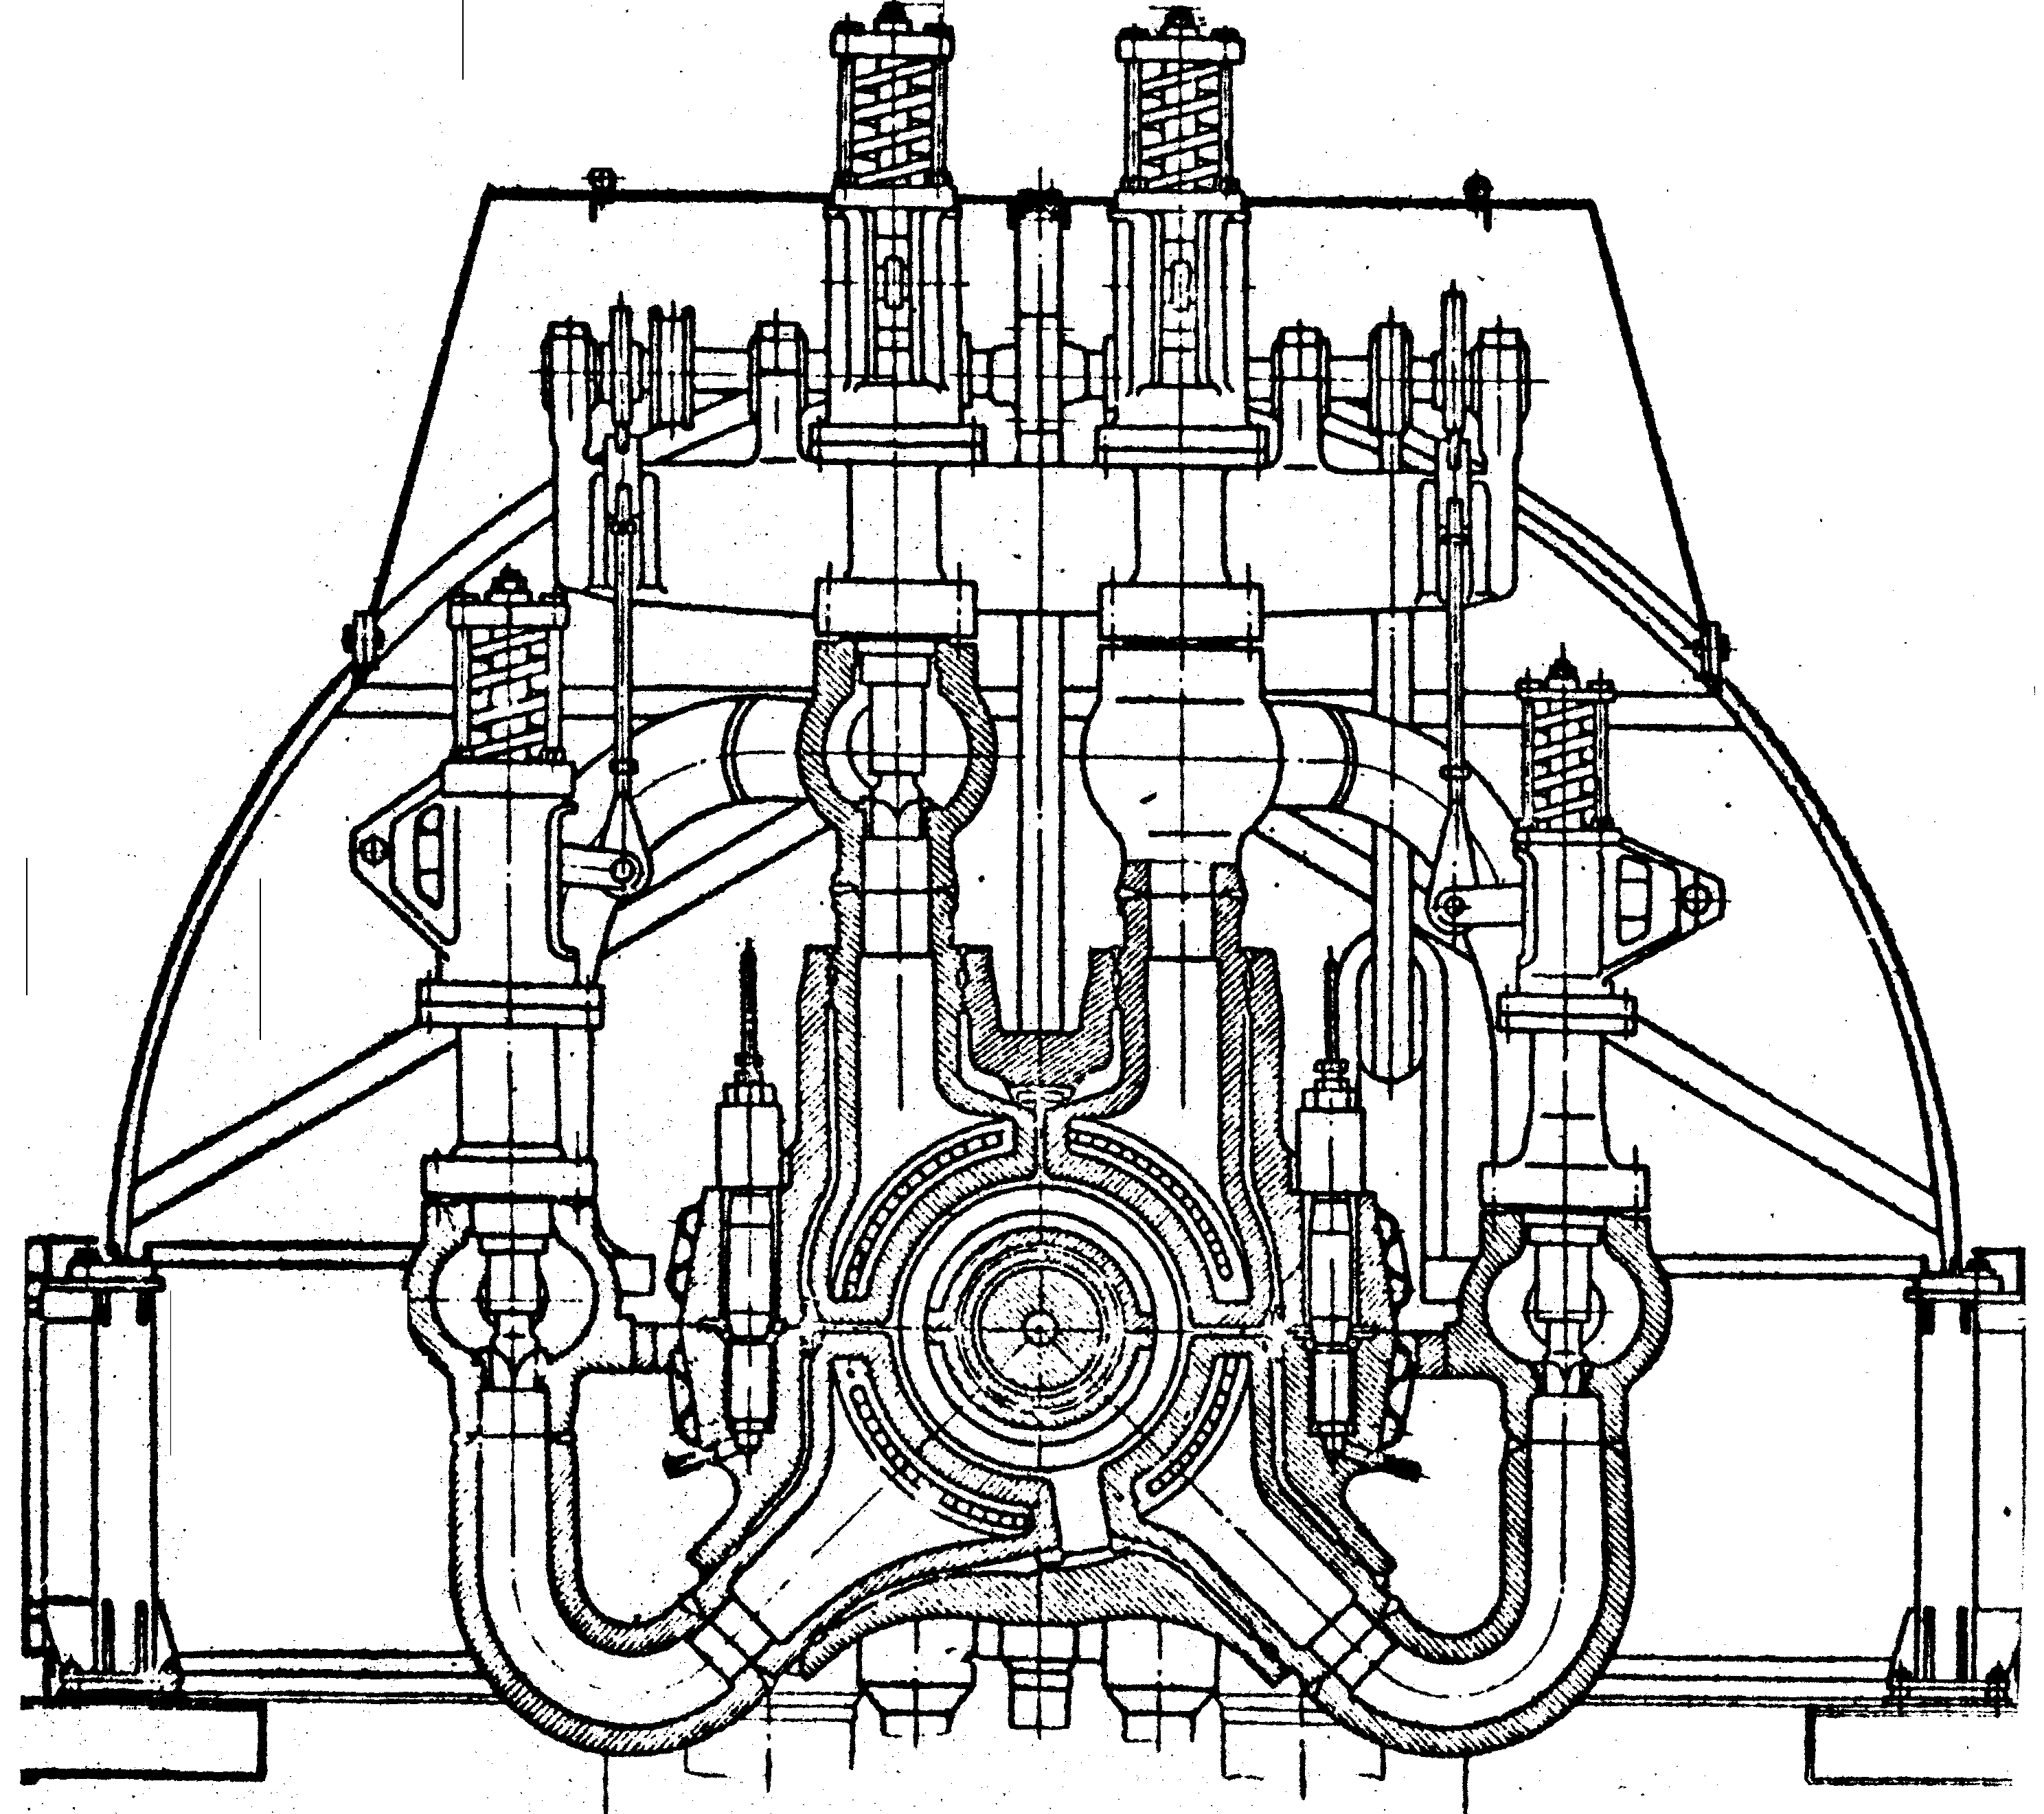

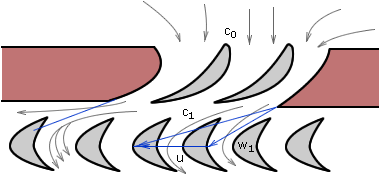

<font size=6> $$\zeta_{парциальности} = \zeta_{сегментные} + \zeta_{вентеляционные}$$ </font>

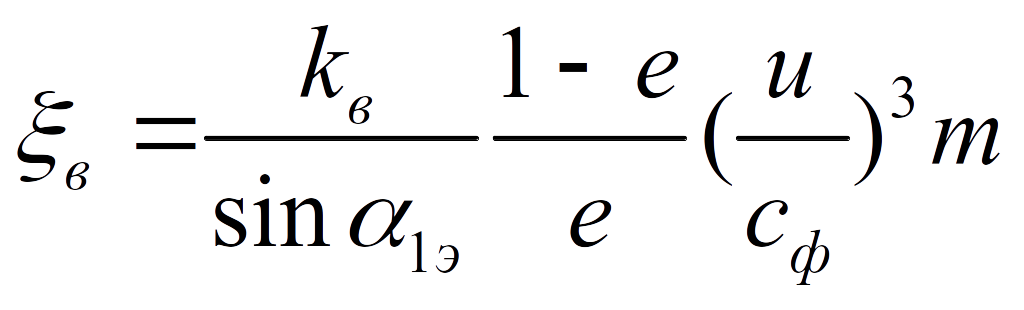

<font size=3> 
Где значение коэффициента kв=0,065;
m – число венцов турбинной ступени (для одновенечной m=1, а двухвенечной m=2) </font>

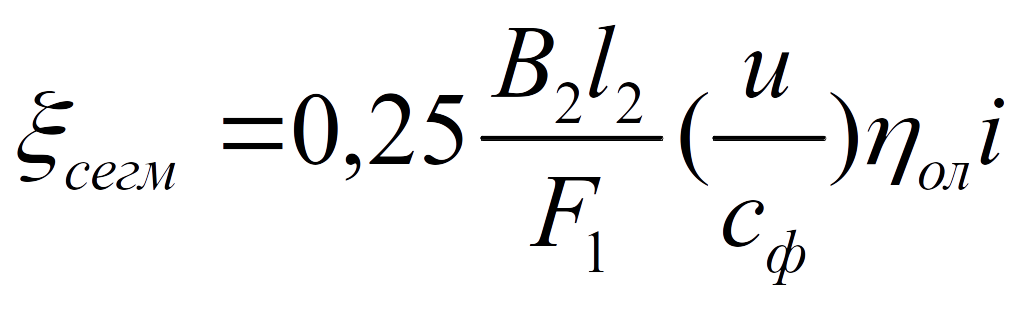

<font size=3> 
где F1 – площадь выходного сечения сопловой решетки; В2 – ширина рабочей решетки; l2 – высота ее лопаток; i – число пар концов сопловых сегментов (обычно i=4, что соответствует количеству сопловых коробок). Для двухвенечной ступени произведение ширины и высоты заменяют суммой $B_2l_2+0,6B_2’l_2’$.
</font>

In [76]:
e = 0.8
H_0 = 81000
sin_alpha_1 = 0.225
u_div_dummy_speed = 0.42
blade_width = 0.035
blade_length = 0.035
blade_efficiency = 0.82
segments = 4
F1 = 0.025

In [65]:
def get_ventilation_loss_pu(m, k, sin, e, u_div_dummy_speed):
    first = k / sin
    second = (1 - e) / e
    third = u_div_dummy_speed ** 3
    
    return first * second * third * m

In [66]:
ventilation_loss_pu = get_ventilation_loss_pu(
    m=1,
    k=0.065,
    e=e,
    u_div_dummy_speed=u_div_dummy_speed,
    sin=sin_alpha_1
)

ventilation_loss_pu

0.0053507999999999984

In [78]:
def get_segment_loss_pu(B, l, F, u_div_dummy_speed, blade_efficiency, segments):
    first = 0.25 * B * l / F
    second = u_div_dummy_speed * blade_efficiency * segments
    return first * second

In [79]:
segment_loss_pu = get_segment_loss_pu(
    B=blade_width,
    l=blade_length,
    F=F1,
    u_div_dummy_speed=u_div_dummy_speed,
    blade_efficiency=blade_efficiency,
    segments=segments
)

segment_loss_pu

0.0168756

In [81]:
partial_losses_pu = segment_loss_pu + ventilation_loss_pu
partial_losses_pu

0.0222264

In [82]:
partial_losses = H_0 * partial_losses_pu
partial_losses

1800.3384

In [83]:
print("Ответ на задачу 3.2: ", round(partial_losses / 1000, 3), "kJ / kg")

Ответ на задачу 3.2:  1.8 kJ / kg


## Задача 3.3

Для турбинной ступени активного типа с ρ = 0,1 оценить  потери от утечек в надбандажном (z = 2; $\delta_r$ = 0,001*$d_у^б$ = 1,17 мм; $\delta_a$ = 4 мм) и диафрагменном (z = 5; $d_{уд}$ = 0,36 м; $\delta_у$ = 0,4 мм) уплотнениях. Принять необходимые величины из исходных данных предыдущих задач.

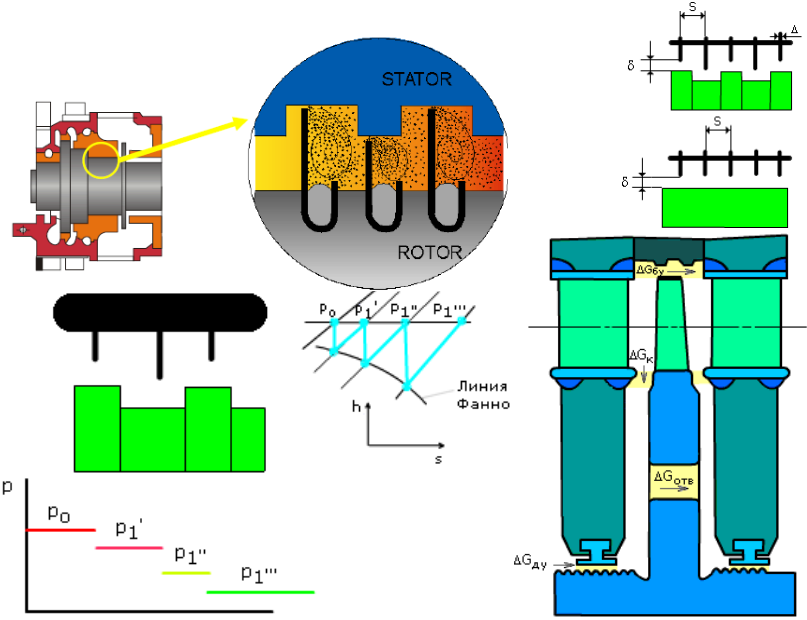

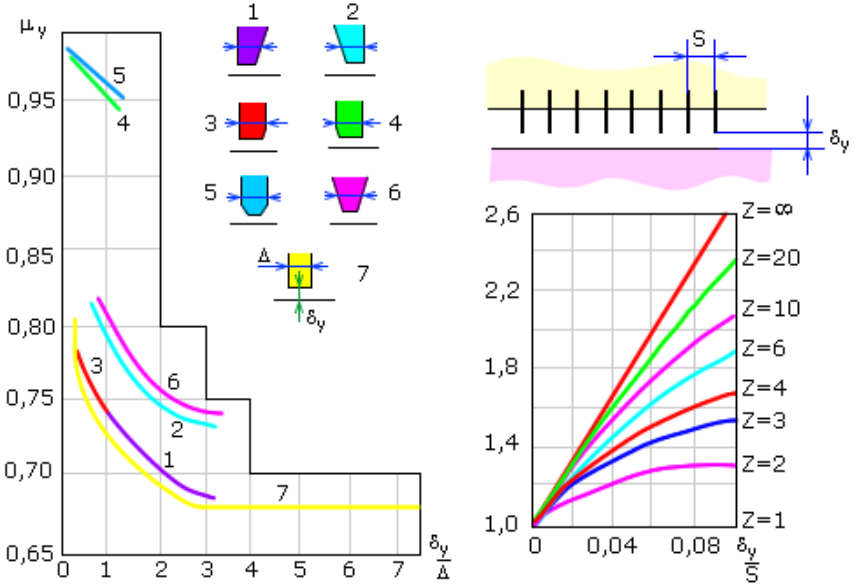

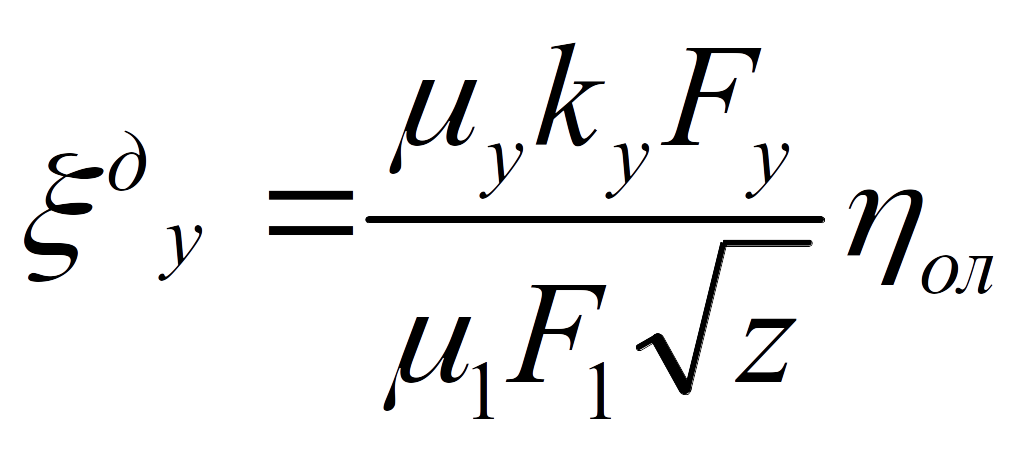

Где:

* $k_у$ – поправочный множитель, значение которого для прямоточной схемы уплотнения находят по данным графикa $k_y=f(\delta_y/S)$, а для ступенчатого уплотнения $k_у$=1; 
* $F_у=\pi \cdot d_у \cdot \delta_у$ – площадь кольцевой щели толщиной $\delta_у$ под гребнем уплотнения;
* $\mu_у$ – коэффициент расхода уплотнения;
* z – число гребней диафрагменного уплотнения;
* $F_{1}$ – площадь выходного сечения сопловой решетки;
* $\mu_1$ – коэффициент расхода сопловой решетки.

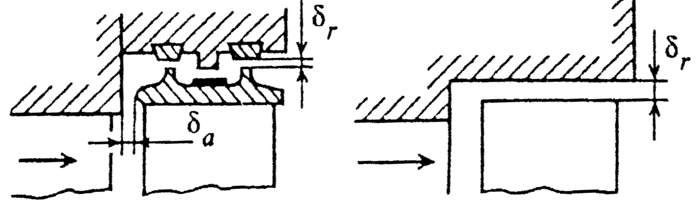

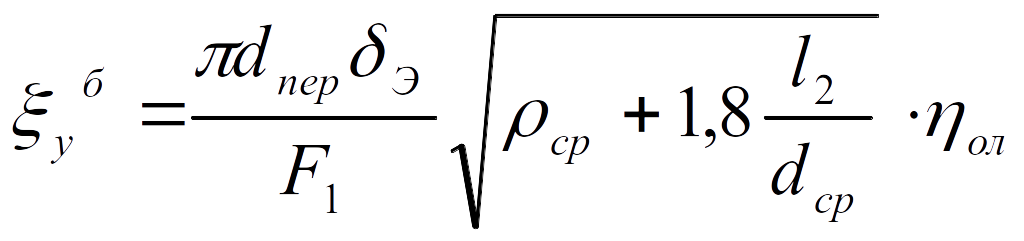

<font size=6>Для реактивной ступени:</font>

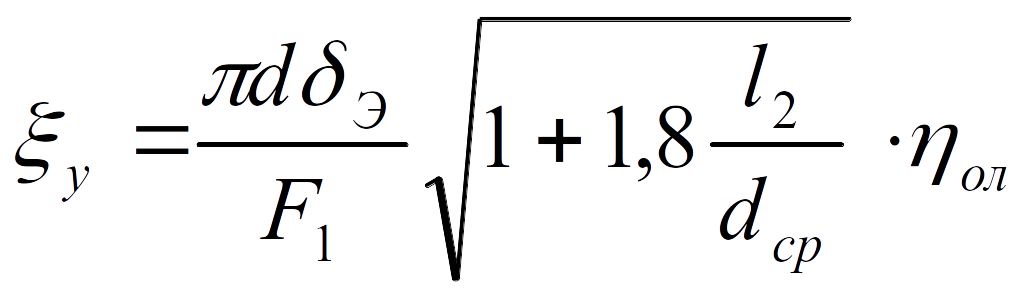

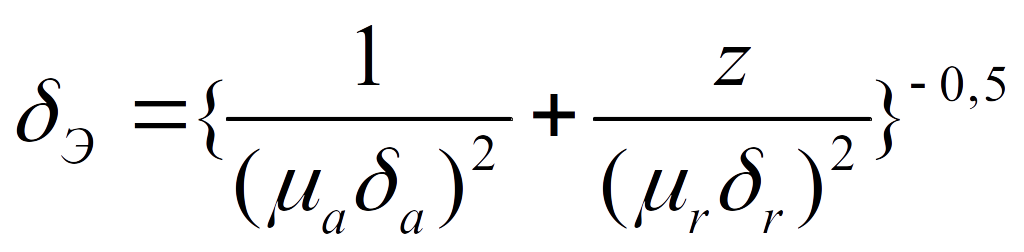

Где:

* $d_{пер}$ – диаметр по периферии рабочих лопаток;
* $\delta_{Э}$ – эквивалентный зазор периферийного уплотнения
* $\rho_{ср}$ – степень реактивности на среднем диаметре ступени.
* Коэффициент расхода для осевого зазора $\delta_a$ принимают равным $\mu_а$=0,5, а коэффициент расхода $\mu_r$ для радиального зазора $\delta_r$ оценивают по эмпирическим зависимостям, представленным на изображении выше. Обычно радиальный зазор $\delta_r$ = 0,001$d_{пер}$. Для рабочей решетки без бандажа $\delta_Э=0,75\delta_r$.

<font size=10>$$\xi_у = \xi_у^б + \xi_у^д$$</font>

In [89]:
degree__of_reaction = 0.1

z_bandage = 2
delta_r_bandage = 1.17 / 1000
delta_a_bandage = 4 / 1000

z_rotor = 5
d_leak_rotor = 0.36
delta_leak_rotor = 0.4 / 1000

# Зададимся толщиной усика для уплотнения бандажа в 4 мм

In [85]:
def compute_equal_gap(z, delta_r, mu_r, delta_a, mu_a):
    first = 1 / (mu_a * delta_a) ** 2
    second = z / (mu_r * delta_r) ** 2
    return (first + second) ** (-0.5)

In [90]:
delta_r_bandage / 0.004

0.2925

In [93]:
# Для надбандажного уплотнения
mu_a = 0.5

# По графику mu = f(зазор / толщина усика) определим при delta_r_bandage / 0.004 ~ 0.3.
# Возьмем квадратное уплотнение
mu_r = 0.8

delta_eq_bandage = compute_equal_gap(z_bandage, delta_r_bandage, mu_r, delta_a_bandage, mu_a)
delta_eq_bandage

0.0006283402044951384

In [95]:
import math

def get_bandage_leak_loss_pu(d_shroud, delta_eq, F, dor, l, efficiency):
    d_avg = d_shroud - l
    
    first = math.pi * d_shroud * delta_eq / F
    second = dor + 1.8 * (l / d_avg)
    
    return first * (second) ** 0.5 * efficiency

In [97]:
d_shroud = delta_r_bandage / 0.001 # По определению задачи

bandage_leak_loss_pu = get_bandage_leak_loss_pu(
    d_shroud=d_shroud,
    delta_eq=delta_eq_bandage,
    F=F1,
    dor=degree__of_reaction,
    l=blade_length,
    efficiency=blade_efficiency
)

bandage_leak_loss_pu

0.029873000853835034

In [98]:
F_leak_rotor = math.pi * d_leak_rotor * delta_leak_rotor
F_leak_rotor

0.00045238934211693025

In [103]:
# Примем, что диафрагменное уплотнение ступенчатое, т.е. Kу = 1
K_y = 1

# По графику mu = f(зазор / толщина усика) определим при delta_leak_rotor / 0.004 ~ 0.1.
# Возьмем квадратное уплотнение
mu_r_rotor = 0.8

# Примем коэффициент расхода сопловой решетки 0.97
mu_nozzle = 0.97

In [104]:
def get_disk_leak_loss_pu(K, F, mu_r, mu_nozzle, F_nozzle, z, efficiency):
    upper = mu_r * K * F * efficiency
    lower = mu_nozzle * F_nozzle * z ** 0.5
    return upper / lower

In [107]:
disk_leak_loss_pu = get_disk_leak_loss_pu(
    K = K_y,
    F = F_leak_rotor,
    mu_r = mu_r_rotor,
    mu_nozzle=mu_nozzle,
    F_nozzle=F1,
    z=z_rotor,
    efficiency=blade_efficiency
)
disk_leak_loss_pu

0.0054729245257981955

In [108]:
leak_losses_pu = disk_leak_loss_pu + bandage_leak_loss_pu
leak_losses_pu

0.03534592537963323

In [109]:
leak_losses = H_0 * leak_losses_pu
leak_losses

2863.0199557502915

In [110]:
print("Ответ на задачу 3.3: ", round(leak_losses / 1000, 3), "kJ / kg")

Ответ на задачу 3.3:  2.863 kJ / kg


## Задача 3.4

Оценить расход водяного пара через промежуточное уплотнение (z = 36), если $F_у$ = 0,415·10-3 м2; $\mu_у$ = 0,74; εz = 0,556; P0 = 18 МПа; V0 = 0,0176 м3/кг.

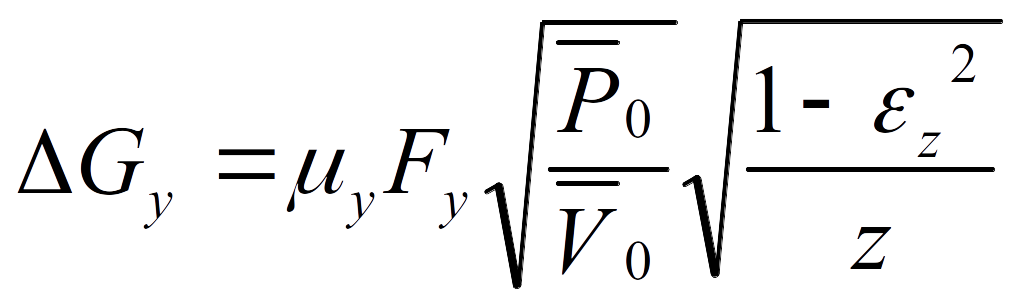

Где
* $\mu_у$ – коэффициент расхода щели уплотнения; 
* $F_у=\pi \cdot d_у \cdot \delta_у$ – площадь кольцевой щели толщиной $\delta_у$ под гребнем уплотнения;
* P0, V0 – параметры торможения водяного пара перед уплотнением;
* εz = Pz/P0 – отношение давления на выходе из уплотнения Pz к давлению торможения на входе в него P0.

Формула справедлива для ступенчатой схемы уплотнения. Для прямоточной схемы необходимо к полученному по значению Gу ввести поправочный коэффициент kу.

In [111]:
z = 36
F_leak = 0.415 * 10 ** (-3)
mu_leak = 0.74
eps = 0.556
P0 = 18 * MPa
V0 = 0.0176

In [112]:
def get_mass_flow_leakage(z, mu, F, eps, P, V):
    first = mu * F
    second = (P / V) ** 0.5
    third = ((1 - eps ** 2) / z) ** 0.5
    return first * second * third

In [114]:
mass_flow_leakage = get_mass_flow_leakage(z=z, mu=mu_leak, F=F_leak, eps=eps, P=P0, V=V0)
mass_flow_leakage

1.3605194852418419

In [115]:
print("Ответ на задачу 3.4: ", round(mass_flow_leakage, 3), "kg")

Ответ на задачу 3.4:  1.361 kg


## Задача 3.5

Оценить коэффициент потерь от влажности водяного пара для турбинной ступени, u/cф = 0,42; y0 = 0,12; y2 = 0,125

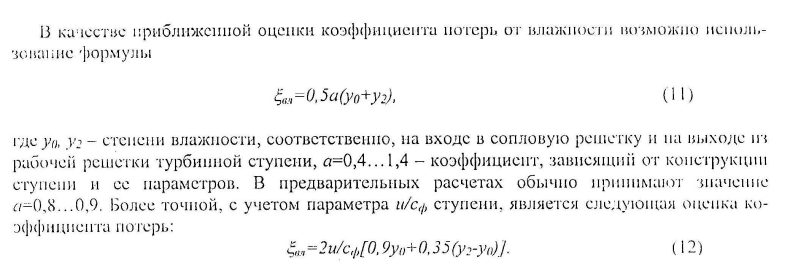

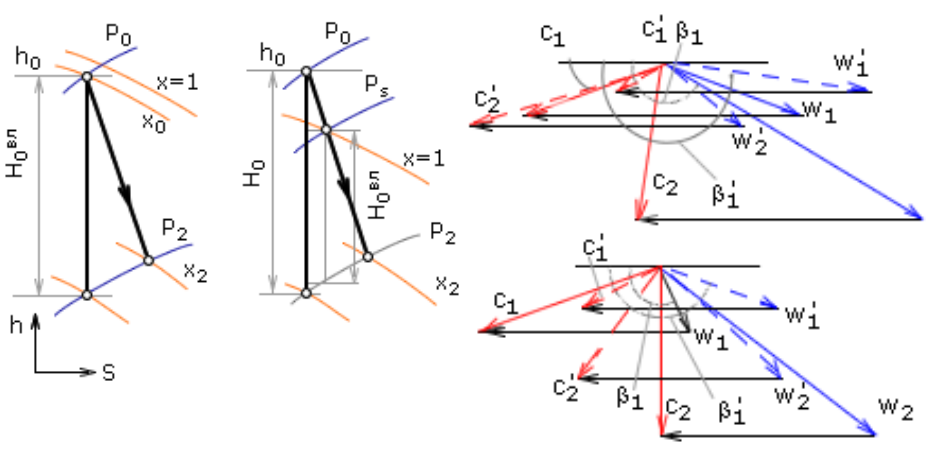

In [116]:
y0 = 0.12
y2 = 0.125
u_div_dummy_speed = 0.42

In [117]:
def get_humidity_loss_pu(u_div_dummy_speed, y0, y2):
    return 2 * u_div_dummy_speed * (0.9 * y0 + 0.35 * (y2 - y0))

In [118]:
humidity_loss_pu = get_humidity_loss_pu(u_div_dummy_speed, y0, y2)
humidity_loss_pu

0.09219

In [119]:
print("Ответ на задачу 3.5: ", round(humidity_loss_pu, 3))

Ответ на задачу 3.4:  0.092


## Задача 3.6

Оценить по ранее полученным значениям величин внутренний относительный КПД ступени (без учета потерь от влажности).

<font size=6>$$\eta_{оi} = \eta_{ол} – (\eta_{тр.д.} + \eta_{парц} + \eta_у)$$</font>

Сумма представленных ранее дополнительных потерь при построении процесса расширения пара в турбинной ступени откладывается в h,s- диаграмме на изобаре $р_2$. При этом потери с выходной скоростью откладываются последними, так как в зависимости от значения $dH_{вс}$ они могут откладываться по изоэнтропе.
Следует отметить, что для промежуточной ступени доля энергии используемой в следующей стуени и доля потерь с выходной скоростью откладываются в h,s- диаграмме, как это показано на рисунке ниже. При этом доля энергии, теряемая в данной ступени - (1-$\xi_{вс}$)$dН_{вс}$, откладывается по изобаре р2, а доля, переходящая в последующую ступень - $\xi_{вс}$$dН_{вс}$, откладывается вертикально.  В упрощенных расчетах принимают для промежуточных ступеней $\xi_{вс}$ = 1.

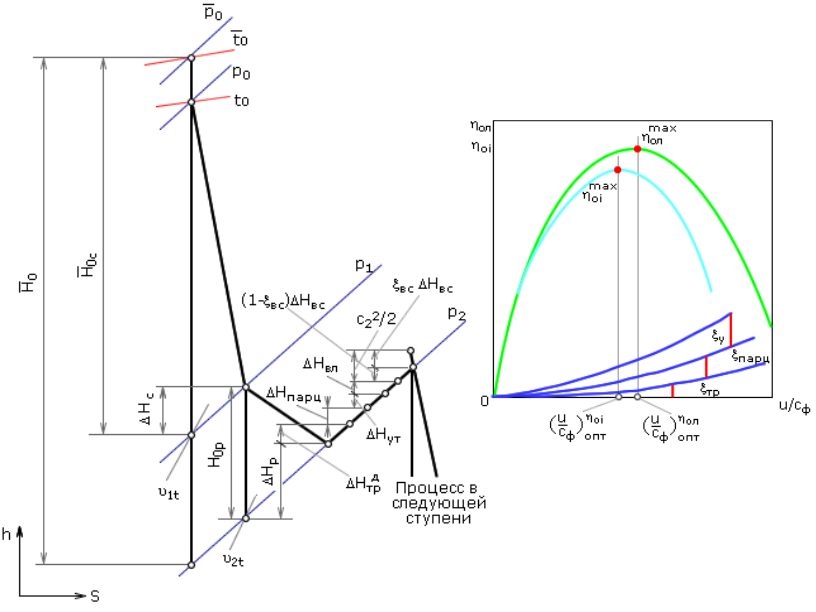

In [120]:
internal_efficiency = blade_efficiency - friction_loss_pu - partial_losses_pu - leak_losses_pu
internal_efficiency

0.7602510619482213

In [121]:
print("Ответ на задачу 3.6: ", round(internal_efficiency * 100, 3), "%")

Ответ на задачу 3.6:  76.025 %
